#<b>Проект: Исследование сердечно-сосудистых заболеваний</b>

##<b>Описание проекта</b>

Этот набор данных содержит некоторую медицинскую информацию о пациентах, которая говорит о вероятности сердечного приступа у определенного человека.

Набор данных датируется 1988 годом и состоит из четырех баз данных: Кливленд, Венгрия, Швейцария и Лонг-Бич, а так же содержит 14 атрибутов с характеристиками пациентов.

Используя полученную информацию, необходимо выявить наиболее подверженную риску категорию пациентов.

##<b>Описание данных</b>

- <b>age</b> - возраст пациента;
- <b>sex</b> - пол (1 = мужчина; 0 = женщина);
- <b>cp</b> - тип боли в груди (4 показателя по нарастанию);
- <b>trestbps</b> - кровяное давление в состоянии покоя;
- <b>chol</b> - уровень холестирина;
- <b>fbs</b> - уровень сахара в крови натощак > 120 мг/дл (1 = да; 0 = нет);
- <b>restecg</b> - результаты экг в состоянии покоя (0 - в норме, 1 - аномалия зубца st-t, 2 - гипертрофия левого желудочка) ;
- <b>thalach</b> - максимальная частота сердечных сокращений;
- <b>exang</b> - стенокардия вызванная физ. нагрузкой (1 = да; 0 = нет);
- <b>oldpeak</b> - снижения сегмента ST на ЭКГ после нагрузки;
- <b>slope</b> - наклон пика ST-сегмента при физической нагрузке (0 - уклон вверх, 1 - ровный, 2 - уклон вниз);
- <b>ca</b> - количество крупных сосудов (0 - 3);
- <b>thal</b> - тип дефекта (0 = нет, 1 = фиксированный, 2 = обратимый);
- <b>target</b>  - наличие сердечно-сосудистых заболеваний (1 = да, 0 = нет).

##<b>Задачи исследования</b>

<b>Предобработка данных</b>

<b>Исследовательский анализ данных</b>

<b>Общий вывод</b>

In [3]:
!gdown --id 1GqeQHaRyDkMgoTUkhyQpAIR3Z9jZNUS0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GqeQHaRyDkMgoTUkhyQpAIR3Z9jZNUS0
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 46.4MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##<b>Предобработка данных</b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isna().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [9]:
df.duplicated().sum()

723

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(302, 14)

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##<b>Исследовательский анализ данных</b>

###Распределение возраста пациента

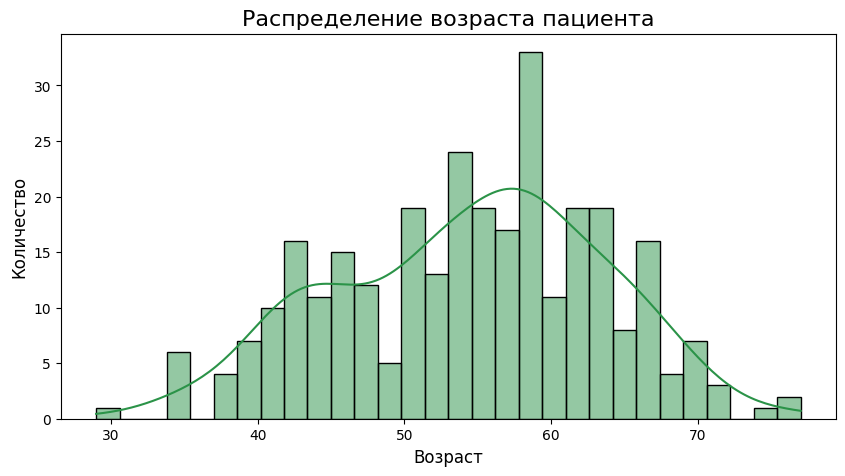

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', bins=30, kde=True, color='#2B9348')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение возраста пациента', fontsize=16);

In [42]:
df['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

###Наличие сердечно-сосудистого заболевания у пациента

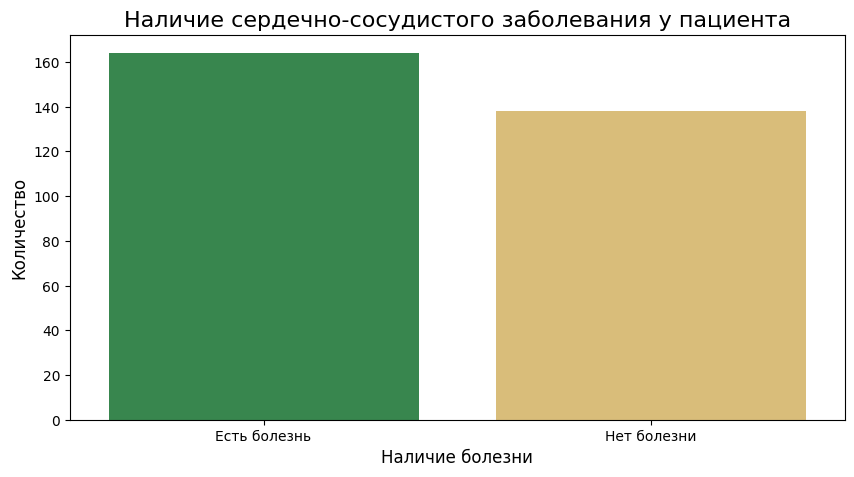

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='target', order=df['target'].value_counts().index, palette=['#2B9348', '#E9C46A'])
plt.gca().set_xticklabels(['Есть болезнь', 'Нет болезни'])
plt.xlabel('Наличие болезни', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Наличие сердечно-сосудистого заболевания у пациента',  fontsize=16);

In [16]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

###Пол пациента

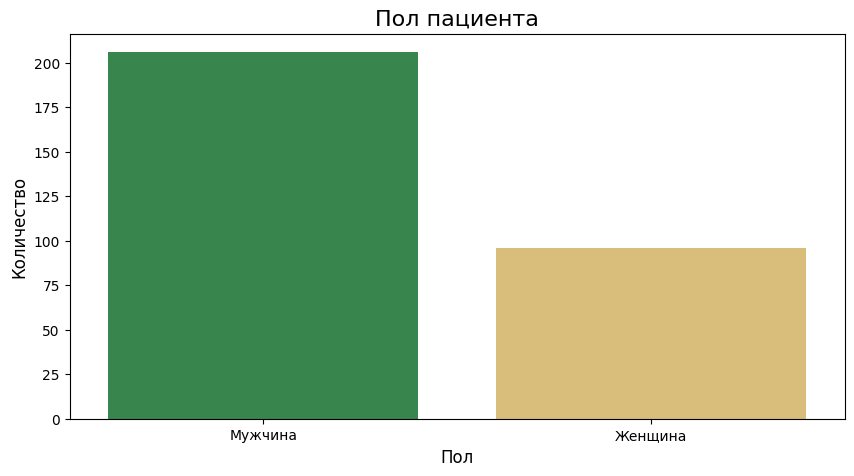

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sex', order=df['sex'].value_counts().index, palette=['#2B9348', '#E9C46A'])
plt.gca().set_xticklabels(['Мужчина', 'Женщина'])
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Пол пациента',  fontsize=16);

In [18]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

###Наличие сердечно-сосудистого заболевания в зависимости от пола

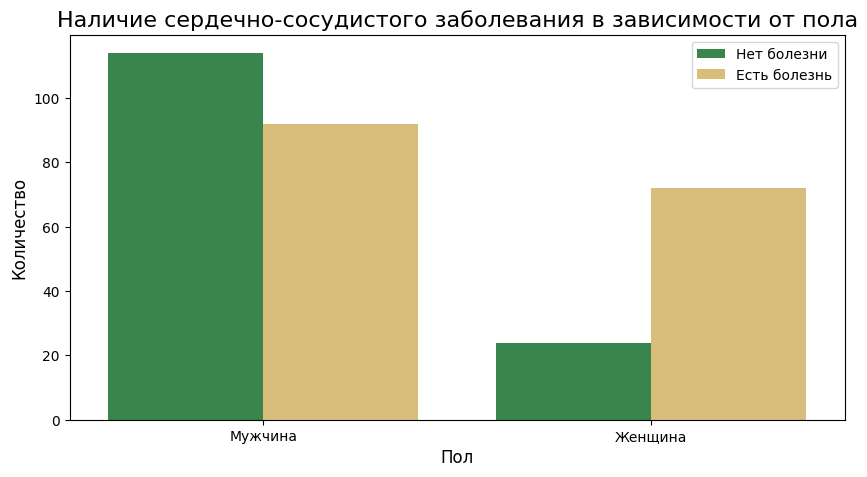

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sex', hue='target', order=df['sex'].value_counts().index, palette=['#2B9348', '#E9C46A'])
plt.gca().set_xticklabels(['Мужчина', 'Женщина'])
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Наличие сердечно-сосудистого заболевания в зависимости от пола',  fontsize=16);


In [32]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

###Количество типа боли в груди по градациям (где 0 - боль отсутствует)

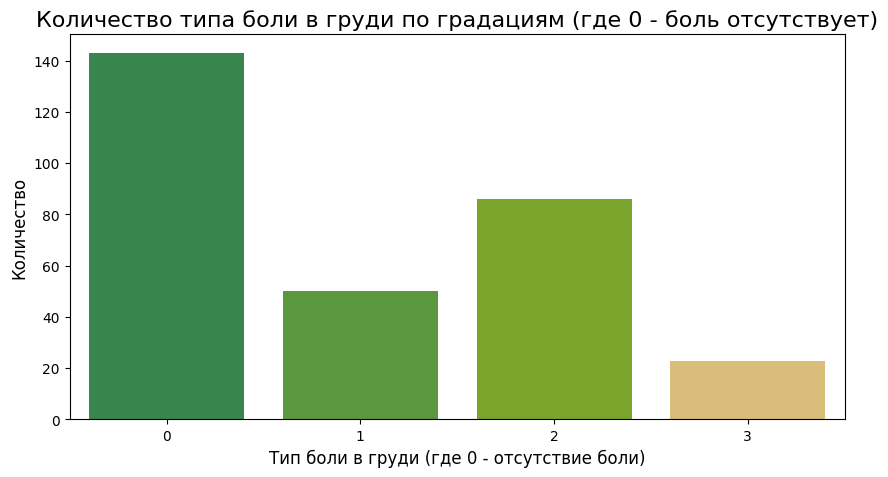

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cp',  palette=['#2B9348', '#55A630', '#80B918', '#E9C46A'])
plt.xlabel('Тип боли в груди (где 0 - отсутствие боли)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Количество типа боли в груди по градациям (где 0 - боль отсутствует)',  fontsize=16);

In [39]:
df['cp'].value_counts().sort_index()

0    143
1     50
2     86
3     23
Name: cp, dtype: int64

###Тип боли в груди в зависимости от наличия сердечно-сосудистого заболевания

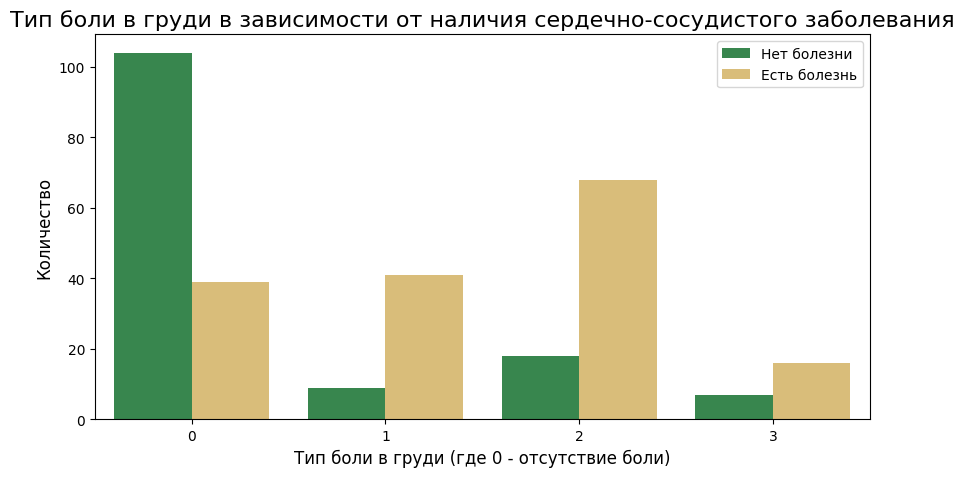

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cp', hue='target', palette=['#2B9348', '#E9C46A'])
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.xlabel('Тип боли в груди (где 0 - отсутствие боли)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Тип боли в груди в зависимости от наличия сердечно-сосудистого заболевания',  fontsize=16);

In [40]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          68
    0          18
3   1          16
    0           7
Name: target, dtype: int64

###Распределение кровяного давления в состоянии покоя

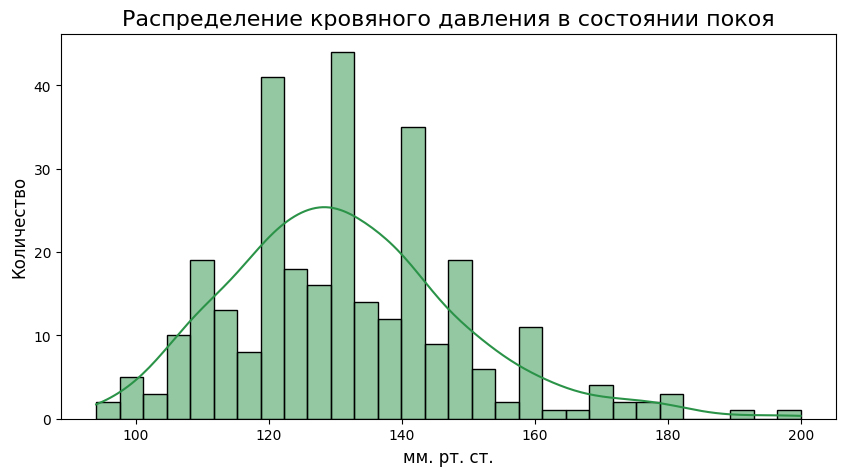

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='trestbps', bins=30, kde=True, color='#2B9348')
plt.xlabel('мм. рт. ст.', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение кровяного давления в состоянии покоя', fontsize=16);

In [44]:
df['trestbps'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

###Распределение уровня холестерина

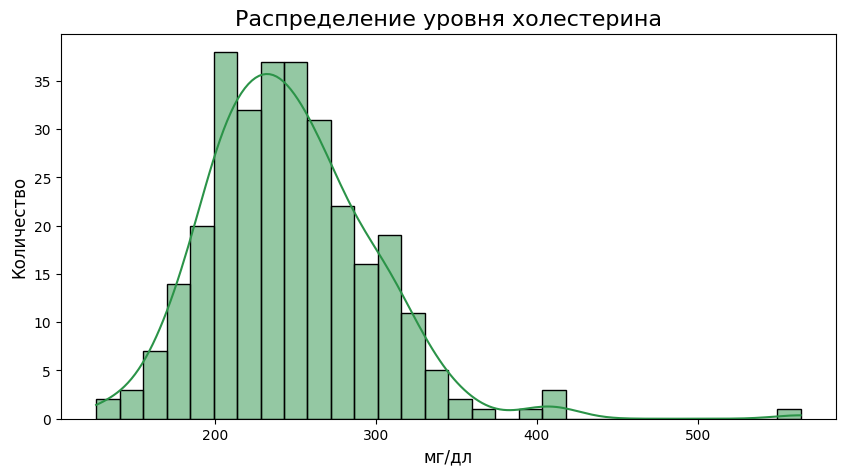

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='chol', bins=30, kde=True, color='#2B9348')
plt.xlabel('мг/дл', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение уровня холестерина', fontsize=16);

In [45]:
df['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

###Уровень сахара в крови натощак в зависимости от наличия сердечно-сосудистого заболевания

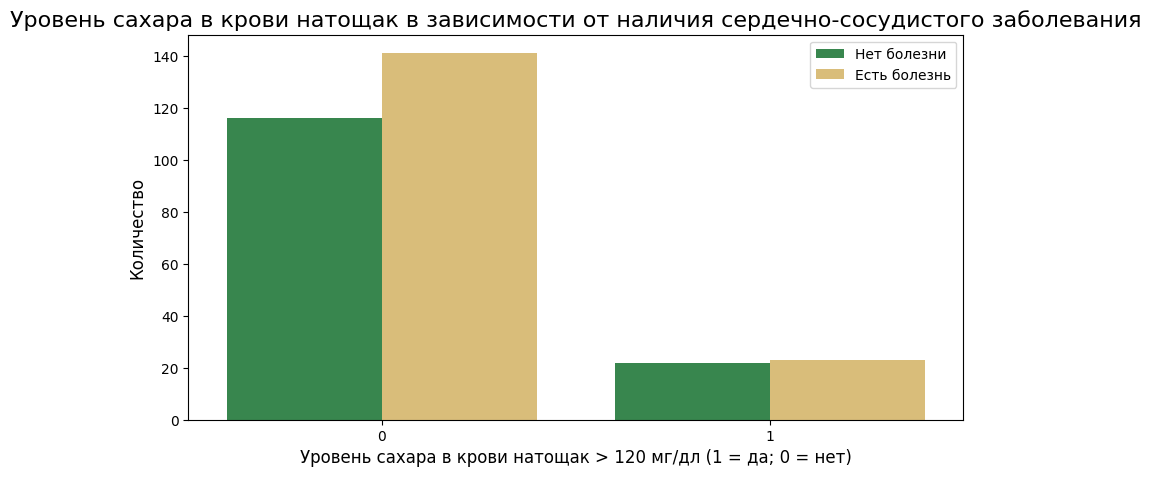

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='fbs', hue='target', palette=['#2B9348', '#E9C46A'])
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.xlabel('Уровень сахара в крови натощак > 120 мг/дл (1 = да; 0 = нет)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Уровень сахара в крови натощак в зависимости от наличия сердечно-сосудистого заболевания',  fontsize=16);

In [46]:
df.groupby('fbs')['target'].value_counts()

fbs  target
0    1         141
     0         116
1    1          23
     0          22
Name: target, dtype: int64

###Результаты экг в состоянии покоя в зависимости от наличия сердечно-сосудистого заболевания

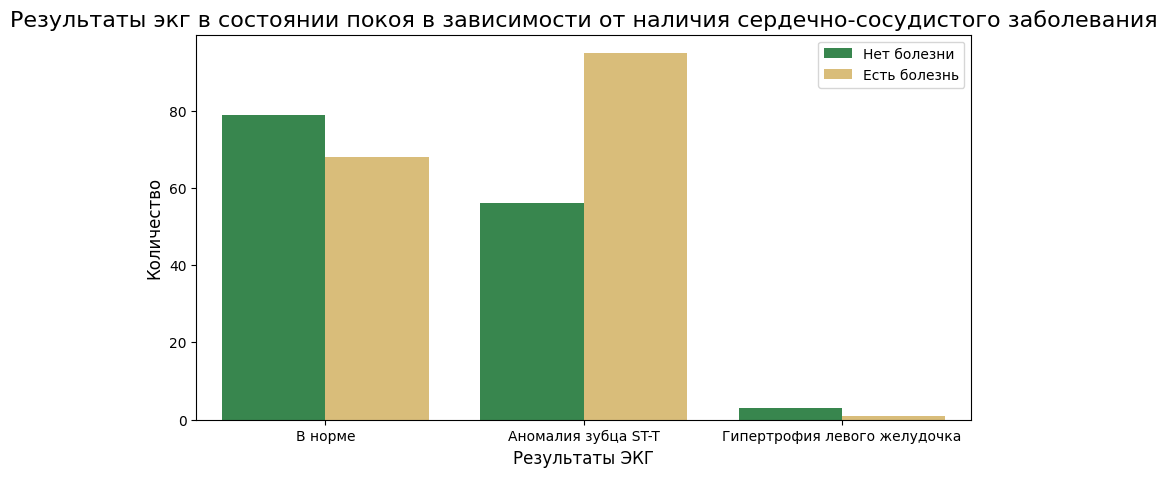

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='restecg', hue='target', palette=['#2B9348', '#E9C46A'])
plt.gca().set_xticklabels(['В норме', 'Аномалия зубца ST-T', 'Гипертрофия левого желудочка'])
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.xlabel('Результаты ЭКГ', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Результаты экг в состоянии покоя в зависимости от наличия сердечно-сосудистого заболевания',  fontsize=16);

In [47]:
df.groupby('restecg')['target'].value_counts()

restecg  target
0        0         79
         1         68
1        1         95
         0         56
2        0          3
         1          1
Name: target, dtype: int64

###Cтенокардия вызванная физ. нагрузкой в зависимости от наличия сердечно-сосудистого заболевания

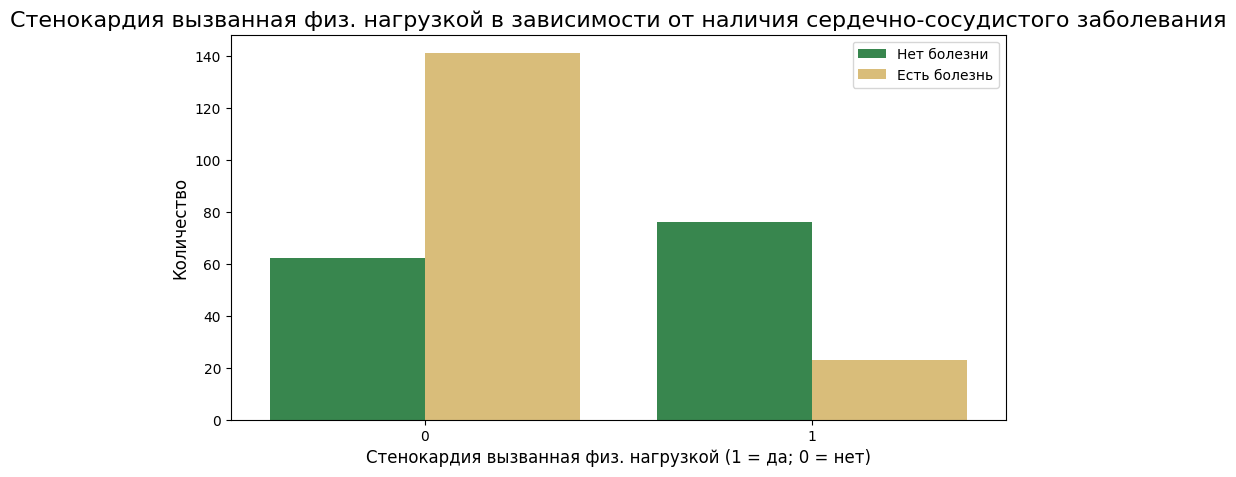

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='exang', hue='target', palette=['#2B9348', '#E9C46A'])
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.xlabel('Cтенокардия вызванная физ. нагрузкой (1 = да; 0 = нет)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Стенокардия вызванная физ. нагрузкой в зависимости от наличия сердечно-сосудистого заболевания',  fontsize=16);

In [48]:
df.groupby('exang')['target'].value_counts()

exang  target
0      1         141
       0          62
1      0          76
       1          23
Name: target, dtype: int64

###Наклон пика ST-сегмента при физической нагрузке в зависимости от наличия сердечно-сосудистого заболевания

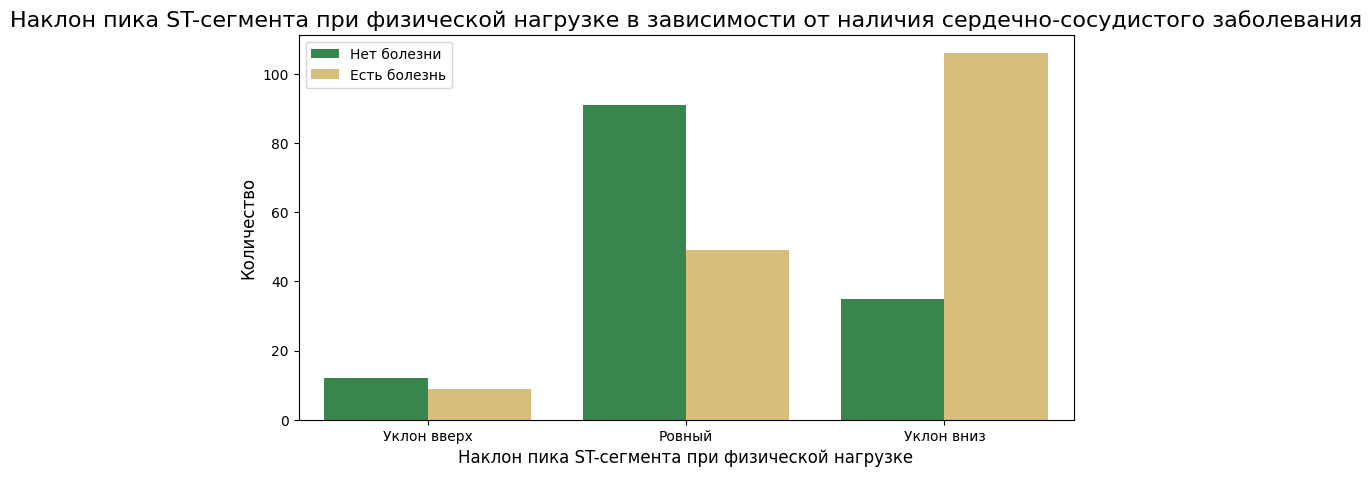

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='slope', hue='target', palette=['#2B9348', '#E9C46A'])
plt.gca().set_xticklabels(['Уклон вверх', 'Ровный', 'Уклон вниз'])
plt.legend(['Нет болезни', 'Есть болезнь'])
plt.xlabel('Наклон пика ST-сегмента при физической нагрузке', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Наклон пика ST-сегмента при физической нагрузке в зависимости от наличия сердечно-сосудистого заболевания',  fontsize=16);

In [49]:
df.groupby('slope')['target'].value_counts()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         106
       0          35
Name: target, dtype: int64

###Тип дефекта в зависимости от наличия сердечно-сосудистого заболевания

In [28]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [29]:
df.replace({'thal': {0: np.NaN}}, inplace=True)

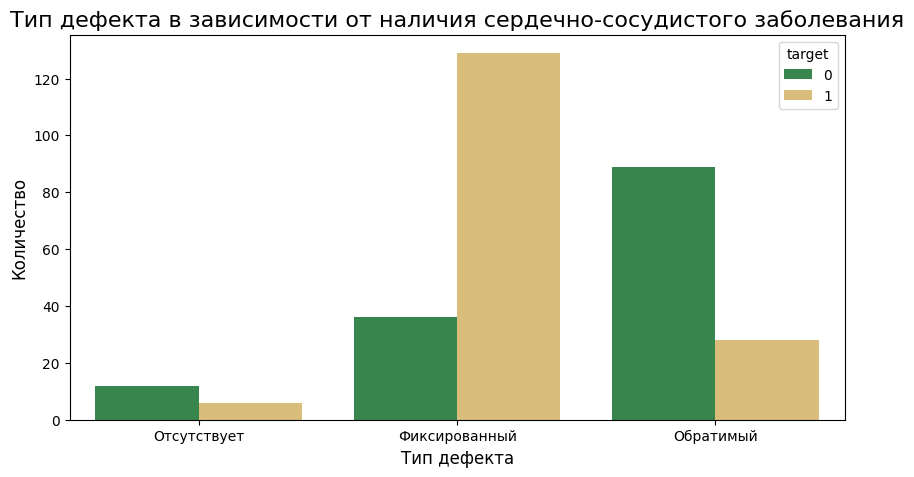

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='thal', hue='target', palette=['#2B9348', '#E9C46A'])
plt.gca().set_xticklabels(['Отсутствует', 'Фиксированный', 'Обратимый'])
plt.xlabel('Тип дефекта', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Тип дефекта в зависимости от наличия сердечно-сосудистого заболевания',  fontsize=16);

In [50]:
df.groupby('thal')['target'].value_counts()

thal  target
1.0   0          12
      1           6
2.0   1         129
      0          36
3.0   0          89
      1          28
Name: target, dtype: int64

###Построим матрицу корреляции

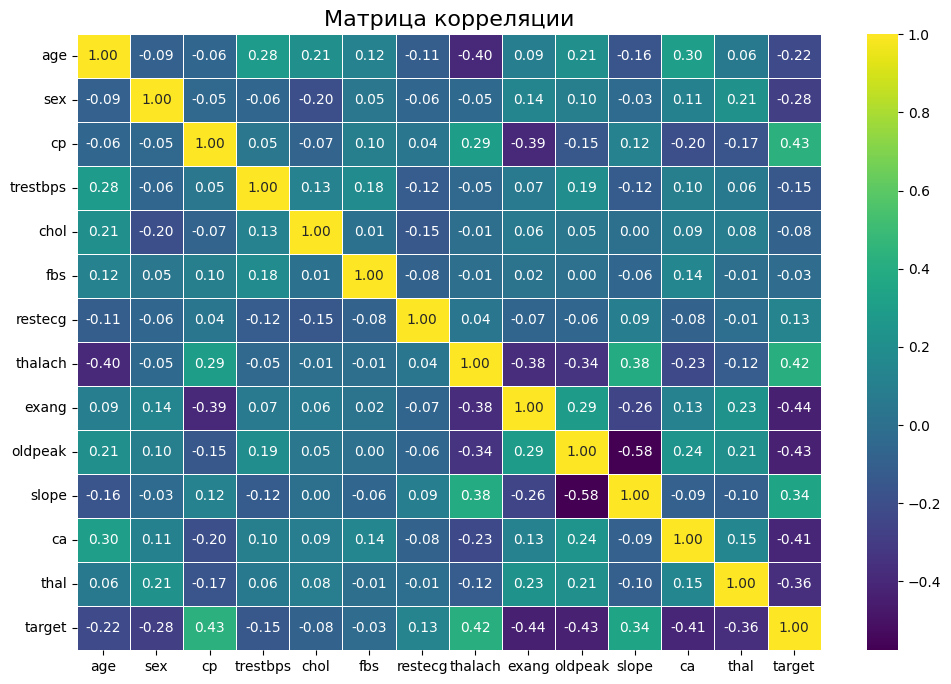

In [66]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidth=.5,  fmt=".2f")
plt.title('Матрица корреляции', fontsize = 16);

##<b>Общий вывод</b>

- Минимальный возраст пациента составляет <b>29</b> лет, максимальный <b>77</b>.
<br>Наблюдается резкий всплеск в районе <b>58-59</b> лет;
- У <b>54 %</b> пациентов имеются сердечно-сосудистые заболевания;
- <b>68 %</b> пациентов составляют мужчины;
- У <b>45 %</b> мужчин и <b>75 %</b> женщин есть сердечно-сосудистые заболевания;
- У <b>47 %</b> пациентов отсутствует какая либо боль в груди;
- Максимальное кровянное давление <b>200</b> мм.рт.ст, минимальное <b>94</b> мм.рт.ст.<br>
Основная доля составляет между <b>120</b> и <b>140</b> мм.рт.ст;
- Средний уровень холестерина составляет <b>250</b>, основная доля составляет между <b>200</b> и <b>280</b>;
- При низком содержании сахара в крови натощак, наблюдается резкий рост пациентов с заболеваниями (<b>45 %</b> от общего кол-ва);
- Около <b>31 %</b> пациентов с сердечно-сосудистыми заболеваниями имеют <b>аномалию зубца ST-T</b> по результатам ЭКГ;
- У <b>46 %</b> выявлена <b>стенокардия</b> после физических нагрузок;
- Наклон пика ST-сегмента при физической нагрузке имеют <b>35 %</b> пациентов;
- <b>42 %</b> имеют <b>фиксированный</b> тип дефекта;
- Наблюдается <b>положительная</b> корреляция между:
  - наличием заболевания и типом боли в груди;
  - наличием заболевания и максимальной частотой сердечных
сокращений;
  - наличием заболевания и наклоном пика ST-сегмента при физической нагрузке.
- Наблюдается <b>отрицательная</b> корреляция между:
  - снижением сегмента ST на ЭКГ после нагрузки и наклоном пика ST-сегмента при физической нагрузке,
  - наличием заболевания и стенокардии вызванной физической нагрузкой,
  -наличием заболевания и снижением сегмента ST на ЭКГ после нагрузки.